In [5]:
import requests
import os 
from PIL import Image
from IPython.display import IFrame
#GET request //# Use single quotation marks for defining string
url='https://www.ibm.com/'  
r=requests.get(url)
#status of the request
r.status_code  
#view request headers //r.request.body
print(r.request.headers)  
#HTTP response header
header=r.headers  
#obtain the date
header['date']  
#obtain the type of data
header['Content-Type']  
r.encoding
#view text
r.text[0:100]  
#write content(image)
path=os.path.join(os.getcwd(),'image.png')
with open(path,'wb') as f:
    f.write(r.content)
Image.open(path)

{'User-Agent': 'python-requests/2.26.0', 'Accept-Encoding': 'gzip, deflate, br', 'Accept': '*/*', 'Connection': 'keep-alive', 'Cookie': '_abck=50FDBF8B5BD5E5DBE47ED70EA981E3B8~-1~YAAQK2UzuPKRZnF/AQAA06J5dQeDjwZApOqh0gnpL5pv0NXMPUwC+p1OdbkFd0lse+wWcuBH4TKZikEECUw9+tJVFnC905MLaGH6KacdgNrkaP00XFqoNVqOEo0LNyoAhBRkjpzOx3SFyDpJXJd1vio1fuxmS6lXDYAOeNeV6oq8wRphzsuC82LPZNyJ7efVQZplUpgKI0Kv5OYiOrieCHZGY4E9PmGmdY0h3QsSMr63tI/fjdVlQX2Mn2Id+q/9CFEXfbPdbUq1RO4TGFgmAVl2pa61g8o/Mt7gnrIZPhuC5M5uS2WqZx9SBZhimCt+TI2L7xtw2WEXUZqVEIlYHsyOVo3yiq3qXfj0QJS17xv2bxu5rJ0=~-1~-1~-1; bm_sz=91B47535C5F7A19B30A0A223F7E81EC9~YAAQK2UzuPORZnF/AQAA1KJ5dQ/PQV/jHdHc4F+iQaqidXHepHpULPk8Wb7sy7omCKPJISL+in90Etzkx7ZYlai4F2U6a6kTkHgWijHBokfX7jPBhEOCA+bZiJ7INtsT5jLJFctnE9Of3wmu5mmfwF8Wss2GZ0NZzptsGc2KM7/9I0i7rcCAN8KPMcc9UMEpIYJMpYYzJ2smerVYM/cpET6WebRdpxBRulaJPsInIWMvAepJCVXAcnsw/i5ac6+wKNwMUWqhtVnGgnSiEItHjTY1qWAcnj8HPV206WJSAo4=~3359300~3223604'}


UnidentifiedImageError: cannot identify image file '/resources/labs/DS0105EN/image.png'

In [6]:
url_get='http://httpbin.org/get'
#To create a Query string, add a dictionary.
payload={"name":"Joseph","ID":"123"}  
r=requests.get(url_get,params=payload)
r.url  #'http://httpbin.org/get?name=Joseph&ID=123'
#key args in JSON format
r.json()['args']  

{'ID': '123', 'name': 'Joseph'}

In [7]:
url_post='http://httpbin.org/post'
r_post=requests.post(url_post,data=payload)
r_post.url 
r_post.request.body
r_post.json()['form']

{'ID': '123', 'name': 'Joseph'}

In [8]:
from bs4 import BeautifulSoup  # this module helps in web scrapping.
import requests  # this module helps us to download a web page
url = "http://www.ibm.com"
# get the contents of the webpage in text format and store in a variable called data
data  = requests.get(url).text  
# create a soup object using the variable 'data'
soup = BeautifulSoup(data,"html5lib")  
# in html anchor/link is represented by the tag <a>
for link in soup.find_all('a'):  
    print(link.get('href'))
# in html image is represented by the tag <img>
for link in soup.find_all('img'):
    print(link.get('src'))

ModuleNotFoundError: No module named 'bs4'

In [9]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/HTMLColorCodes.html"
# get the contents of the webpage in text format and store in a variable called data
data  = requests.get(url).text  
soup = BeautifulSoup(data,"html5lib")
# in html table is represented by the tag <table>
table = soup.find('table') 
# in html table row is represented by the tag <tr>
for row in table.find_all('tr'): 
    # in html a column is represented by the tag <td>
    cols = row.find_all('td') 
    # store the value in column 3 as color_name
    color_name = cols[2].getText() 
    # store the value in column 4 as color_code
    color_code = cols[3].getText() 
    print("{}--->{}".format(color_name,color_code))

NameError: name 'BeautifulSoup' is not defined

In [10]:
import pandas as pd
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m1_survey_data.csv"
df = pd.read_csv(dataset_url)

In [11]:
#Display the top & bottom 5 rows and columns from your dataset
df.head()  
df.tail()
#The number of rows in the dataset.
df.shape[0]  
#The number of columns in the dataset.
df.shape[1]  
#Print the datatype of all columns.
df.dtypes  
#Print the mean age of the survey participants.
df["Age"].mean()
#Print how many unique countries are there in the Country column.
df["Country"].nunique()  

135

In [12]:
import pandas as pd
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m1_survey_data.csv")

In [13]:
#Find how many duplicate rows exist in the dataframe.
df.duplicated(keep='first').sum()  
#Show duplicated rows
duplicateRows = df[df.duplicated()]  
duplicateRows  
#numbers of duplicate values in the column Respondent
df["Respondent"].duplicated(keep='first').sum()  

154

In [14]:
#Remove the duplicate rows from the dataframe.
df.drop_duplicates(ignore_index=True, inplace=True)  
#Verify if duplicates were actually dropped.
df.duplicated(keep='first').sum()  
#number of rows and columns left
df.shape  
#numbers of unique rows left in the column Respondent
df["Respondent"].nunique  

<bound method IndexOpsMixin.nunique of 0            4
1            9
2           13
3           16
4           17
         ...  
11393    25136
11394    25137
11395    25138
11396    25141
11397    25142
Name: Respondent, Length: 11398, dtype: int64>

In [15]:
#Find the missing values for all columns.
df.isnull().sum()  
#Find out how many rows are missing in the column EdLevel
df["EdLevel"].isnull().sum()  

112

In [16]:
#Find the value counts for the column WorkLoc.
df["WorkLoc"].value_counts()  
#Impute (replace) all the empty rows in the column WorkLoc with the value that you have identified as majority.
df["WorkLoc"].fillna(value="Office",inplace=True)  
#After imputation there should ideally not be any empty rows in the WorkLoc column.
df["WorkLoc"].isnull().sum()  

0

100000.0

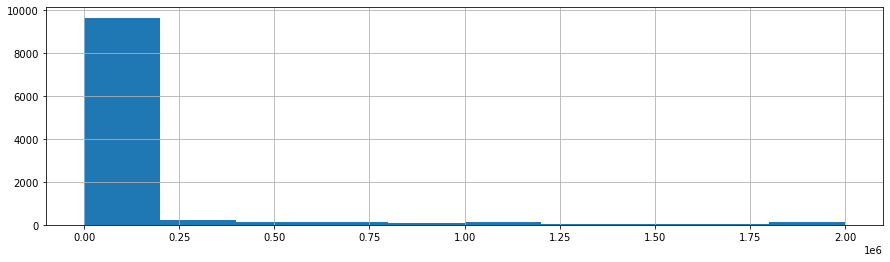

In [17]:
#List out the various categories in the column 'CompFreq'
df["CompFreq"].unique()  
#If the CompFreq is Yearly then use the exising value in CompTotal
df["CompFreq"].replace(to_replace="Yearly",value=1,inplace=True)  
#If the CompFreq is Monthly then multiply the value in CompTotal with 12 (months in an year)
df["CompFreq"].replace(to_replace="Monthly",value=12,inplace=True)  
#If the CompFreq is Weekly then multiply the value in CompTotal with 52 (weeks in an year)
df["CompFreq"].replace(to_replace="Weekly",value=52,inplace=True)  
df["CompFreq"].unique()
df["CompFreq"].value_counts()
#it makes comparison of salaries easy.
df['NormalizedAnnualCompensation'] = df["CompTotal"] * df["CompFreq"]  
df["Respondent"].nunique()
df["ConvertedComp"].describe()
df["ConvertedComp"].hist(figsize=(15,4))
df['NormalizedAnnualCompensation'].median()